In [36]:
import pandas as pd
import numpy as np
import warnings

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AKSHAIYA/Datasets/main/bike_share.csv")

In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [6]:
df.duplicated().sum()

21

In [7]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
df.shape

(10886, 11)

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(10865, 11)

In [14]:
df.nunique()

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(df[['temp']],df['registered'])

LinearRegression()

In [18]:
m =model.coef_
b = model.intercept_

In [19]:
registered_pred = model.predict(df[["temp"]])

In [20]:
registered_pred

array([ 91.75985769,  86.70939532,  86.70939532, ..., 117.01216954,
       117.01216954, 111.96170717])

In [21]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
registered_actual = df[['registered']]

In [23]:
mean_squared_error(registered_actual, registered_pred) #MSE

20510.161750711897

In [25]:
mean_absolute_error(registered_actual, registered_pred) #MAE

105.77505424005079

In [26]:
np.sqrt(mean_squared_error(registered_actual, registered_pred))#RMSE

143.21369260902358

In [27]:
r2_score(registered_actual, registered_pred)

0.10082526251945989

In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [37]:
mean_absolute_percentage_error(registered_actual,registered_pred)

<ipython-input-34-f6e59748ba18>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


inf

In [38]:
import matplotlib.pyplot as plt

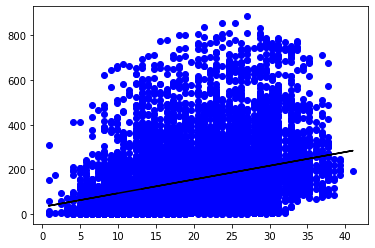

In [40]:
plt.scatter(df['temp'],df['registered'], color='blue')
plt.plot(df['temp'],registered_pred, color='black')

plt.show()